<a href="https://colab.research.google.com/github/dogukartal/IBM_AI_Labs/blob/main/Deep%20Learning%20with%20Keras%20and%20Tensorflow/Unsupervised%20Learning%20Autoencoders%20and%20Diffusion%20Models/Building_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Encoder
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)

# Bottleneck
bottleneck = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, output_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Summary of the model
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 784)                 │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
autoencoder.fit(
    x_train, x_train,
    epochs=25,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - loss: 0.3520 - val_loss: 0.1757
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1670 - val_loss: 0.1430
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1408 - val_loss: 0.1300
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1288 - val_loss: 0.1189
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1190 - val_loss: 0.1136
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1146 - val_loss: 0.1108
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1123 - val_loss: 0.1086
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1097 - val_loss: 0.1066
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1075 - val_loss: 0.1044
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1055 - val_loss: 0.1027
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1037 - val_loss: 0.1011
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


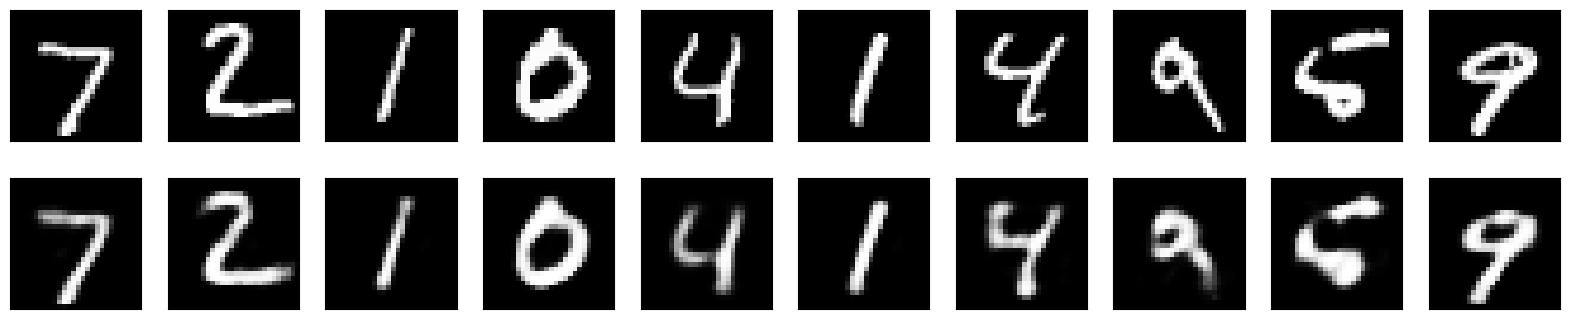

In [4]:
import matplotlib.pyplot as plt

# Predict the test data
reconstructed = autoencoder.predict(x_test)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [5]:
# For finetuning unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]:
    layer.trainable = True

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model again
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0945 - val_loss: 0.0920
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0931 - val_loss: 0.0918
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0929 - val_loss: 0.0917
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0929 - val_loss: 0.0916
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0926 - val_loss: 0.0912
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0925 - val_loss: 0.0912
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0922 - val_loss: 0.0912
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0921 - val_loss: 0.0914
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0920 - val_loss: 0.0912
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0920 - val_loss: 0.0908


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.2012 - val_loss: 0.1395
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1380 - val_loss: 0.1312
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1309 - val_loss: 0.1273
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1274 - val_loss: 0.1257
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1259 - val_loss: 0.1243
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1249 - val_loss: 0.1234
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1236 - val_loss: 0.1230
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1235 - val_loss: 0.1224
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1228 - val_loss: 0.1222
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1227 - val_loss: 0.1219
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1223 - val_loss: 0.1218
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

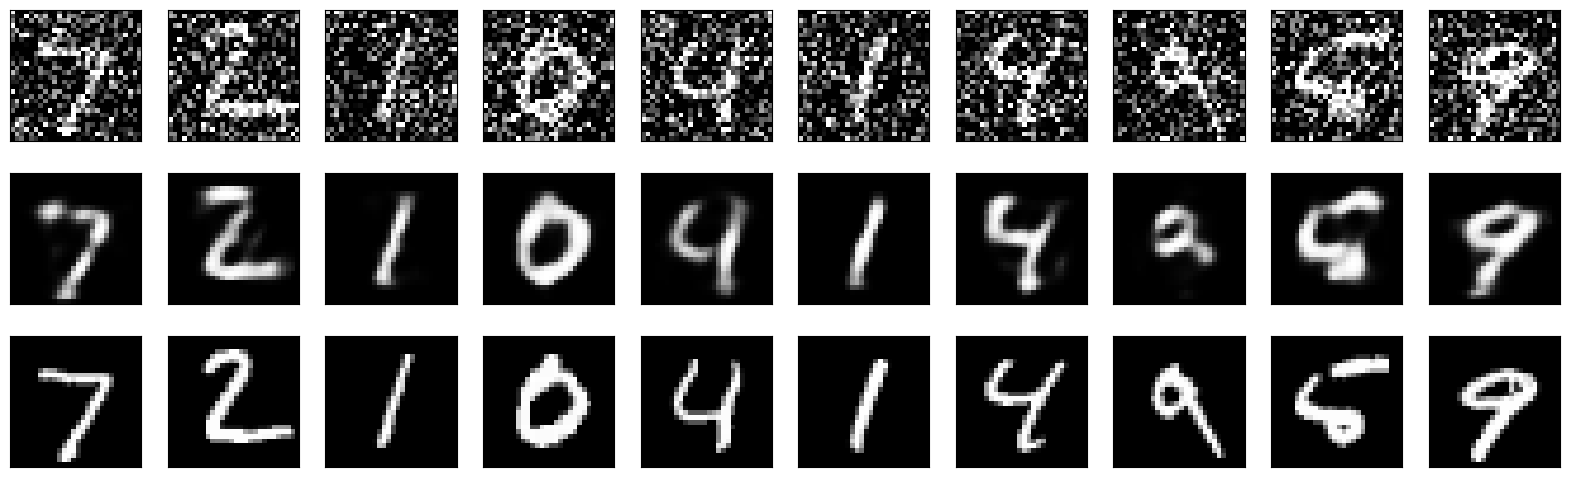

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


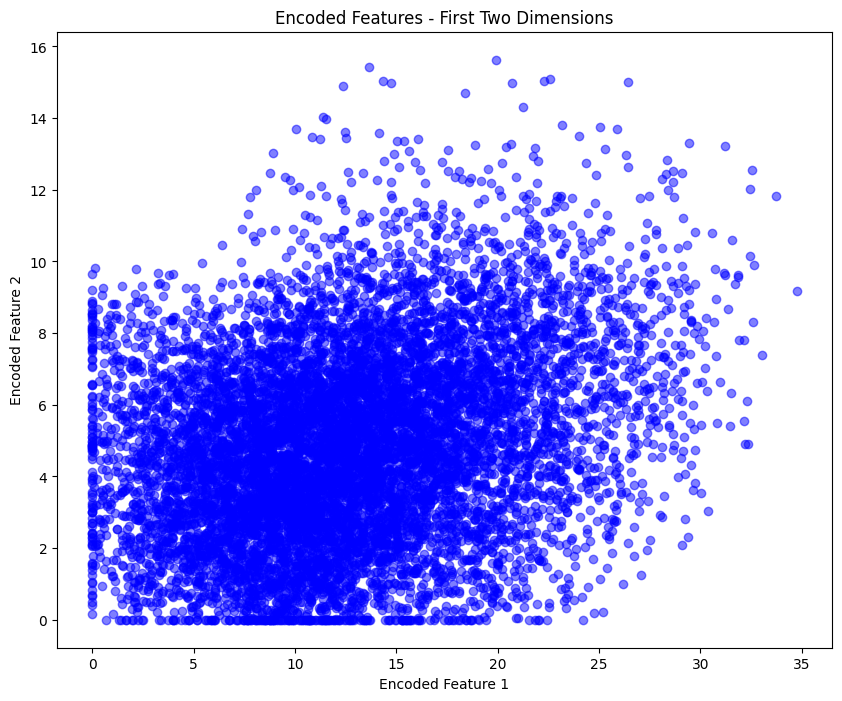

In [7]:
# Extract the encoder part of the autoencoder
encoder_model = Model(input_layer, bottleneck)

# Encode the test data
encoded_imgs = encoder_model.predict(x_test)

# Visualize the first two dimensions of the encoded features
plt.figure(figsize=(10, 8))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5)
plt.title('Encoded Features - First Two Dimensions')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.show()

In [8]:
from tensorflow.keras.regularizers import l2

# Encoder with L2 regularization
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded)

# Decoder with L2 regularization
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck)
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded)

# Autoencoder model with L2 regularization
autoencoder_regularized = Model(input_layer, output_layer)
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder_regularized.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Evaluate the model
loss = autoencoder_regularized.evaluate(x_test, x_test)
print(f'Regularized Autoencoder - Test loss: {loss}')

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 1.7645 - val_loss: 0.4426
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4241 - val_loss: 0.3954
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3927 - val_loss: 0.3805
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3779 - val_loss: 0.3673
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3644 - val_loss: 0.3556
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3535 - val_loss: 0.3456
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3437 - val_loss: 0.3375
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3360 - val_loss: 0.3310
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3294 - val_loss: 0.3245
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3231 - val_loss: 0.3184
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3172 - val_loss: 0.3134
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [ ]:
# Example 1
bottleneck_sizes = [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
    # Encoder
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(
        x_train,
        x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )
    autoencoders.append(autoencoder)

# Evaluate and compare the models
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f'Bottleneck size {size} - Test loss: {loss}')